In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Reading the data in Dataframe 
df=pd.read_csv(r"C:\Users\Ashish\Desktop\Datasets\mushrooms.csv")

In [64]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Observation -

###### -> the data is not in numeric format , for performing operations we have to convert it into numberice format by using Encoding techniques.

###### -> class OR o/p variable is not at end it's at 1st position....move it on last column . which make us easy to perform operations on Independant variables.

In [65]:
#move O/P variable/column on last position
data=pd.DataFrame(df)
target_variable=data.pop("class")
data.insert(22,'class',target_variable)

In [66]:
df.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,...,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,s,m,e


In [67]:
df1=pd.DataFrame()
#convert the data into alphabet to numbers
encoder=LabelEncoder()
#Encoding the columns
j=0
for column in df:
    Enc_column=encoder.fit_transform(df[column])
    df1.insert(j,column,Enc_column)
    j+=1

In [68]:
df1

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,5,5,0,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,11,0,...,5,5,0,0,1,4,0,4,2,0
8121,2,2,4,0,5,0,0,0,5,0,...,5,5,0,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1


In [69]:
df1.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0
5,5,3,9,1,0,1,0,0,5,0,...,7,7,0,2,1,4,2,2,1,0
6,0,2,8,1,0,1,0,0,2,0,...,7,7,0,2,1,4,2,2,3,0
7,0,3,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,3,3,0
8,5,3,8,1,6,1,0,1,7,0,...,7,7,0,2,1,4,2,4,1,1
9,0,2,9,1,0,1,0,0,2,0,...,7,7,0,2,1,4,2,3,3,0


In [70]:
print(type(df1['class']))

<class 'pandas.core.series.Series'>


###### It's an Binary classification problem Bcz it have 2 Class as O/P

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
cap-shape                   8124 non-null int32
cap-surface                 8124 non-null int32
cap-color                   8124 non-null int32
bruises                     8124 non-null int32
odor                        8124 non-null int32
gill-attachment             8124 non-null int32
gill-spacing                8124 non-null int32
gill-size                   8124 non-null int32
gill-color                  8124 non-null int32
stalk-shape                 8124 non-null int32
stalk-root                  8124 non-null int32
stalk-surface-above-ring    8124 non-null int32
stalk-surface-below-ring    8124 non-null int32
stalk-color-above-ring      8124 non-null int32
stalk-color-below-ring      8124 non-null int32
veil-type                   8124 non-null int32
veil-color                  8124 non-null int32
ring-number                 8124 non-null int32
ring-type                   8

In [72]:
df1.isnull().sum()#given query will conunt the null values in features.

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

###### There is no null value in given dataset
###### all data is in same format

In [73]:
#describe data after encoding
df1.describe(include="all", exclude = None)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616,0.482029
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975,0.499708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


In [74]:
print("Total 0's are =>",df1.iloc[:,-1].value_counts()[0])
print("Total 1,s are =>",df1.iloc[:,-1].value_counts()[1])

Total 0's are => 4208
Total 1,s are => 3916


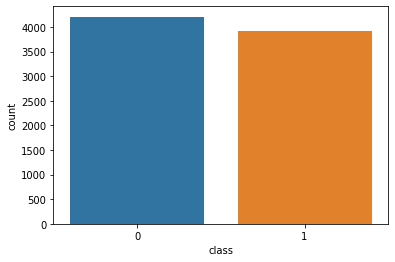

In [75]:
#will check each class frequency by using count plot
sns.countplot(x='class',data=df1)
plt.show()

###### Dataset is not imbalanced we are good to proceed but before we have to clean the data.

In [76]:
df1.shape

(8124, 23)

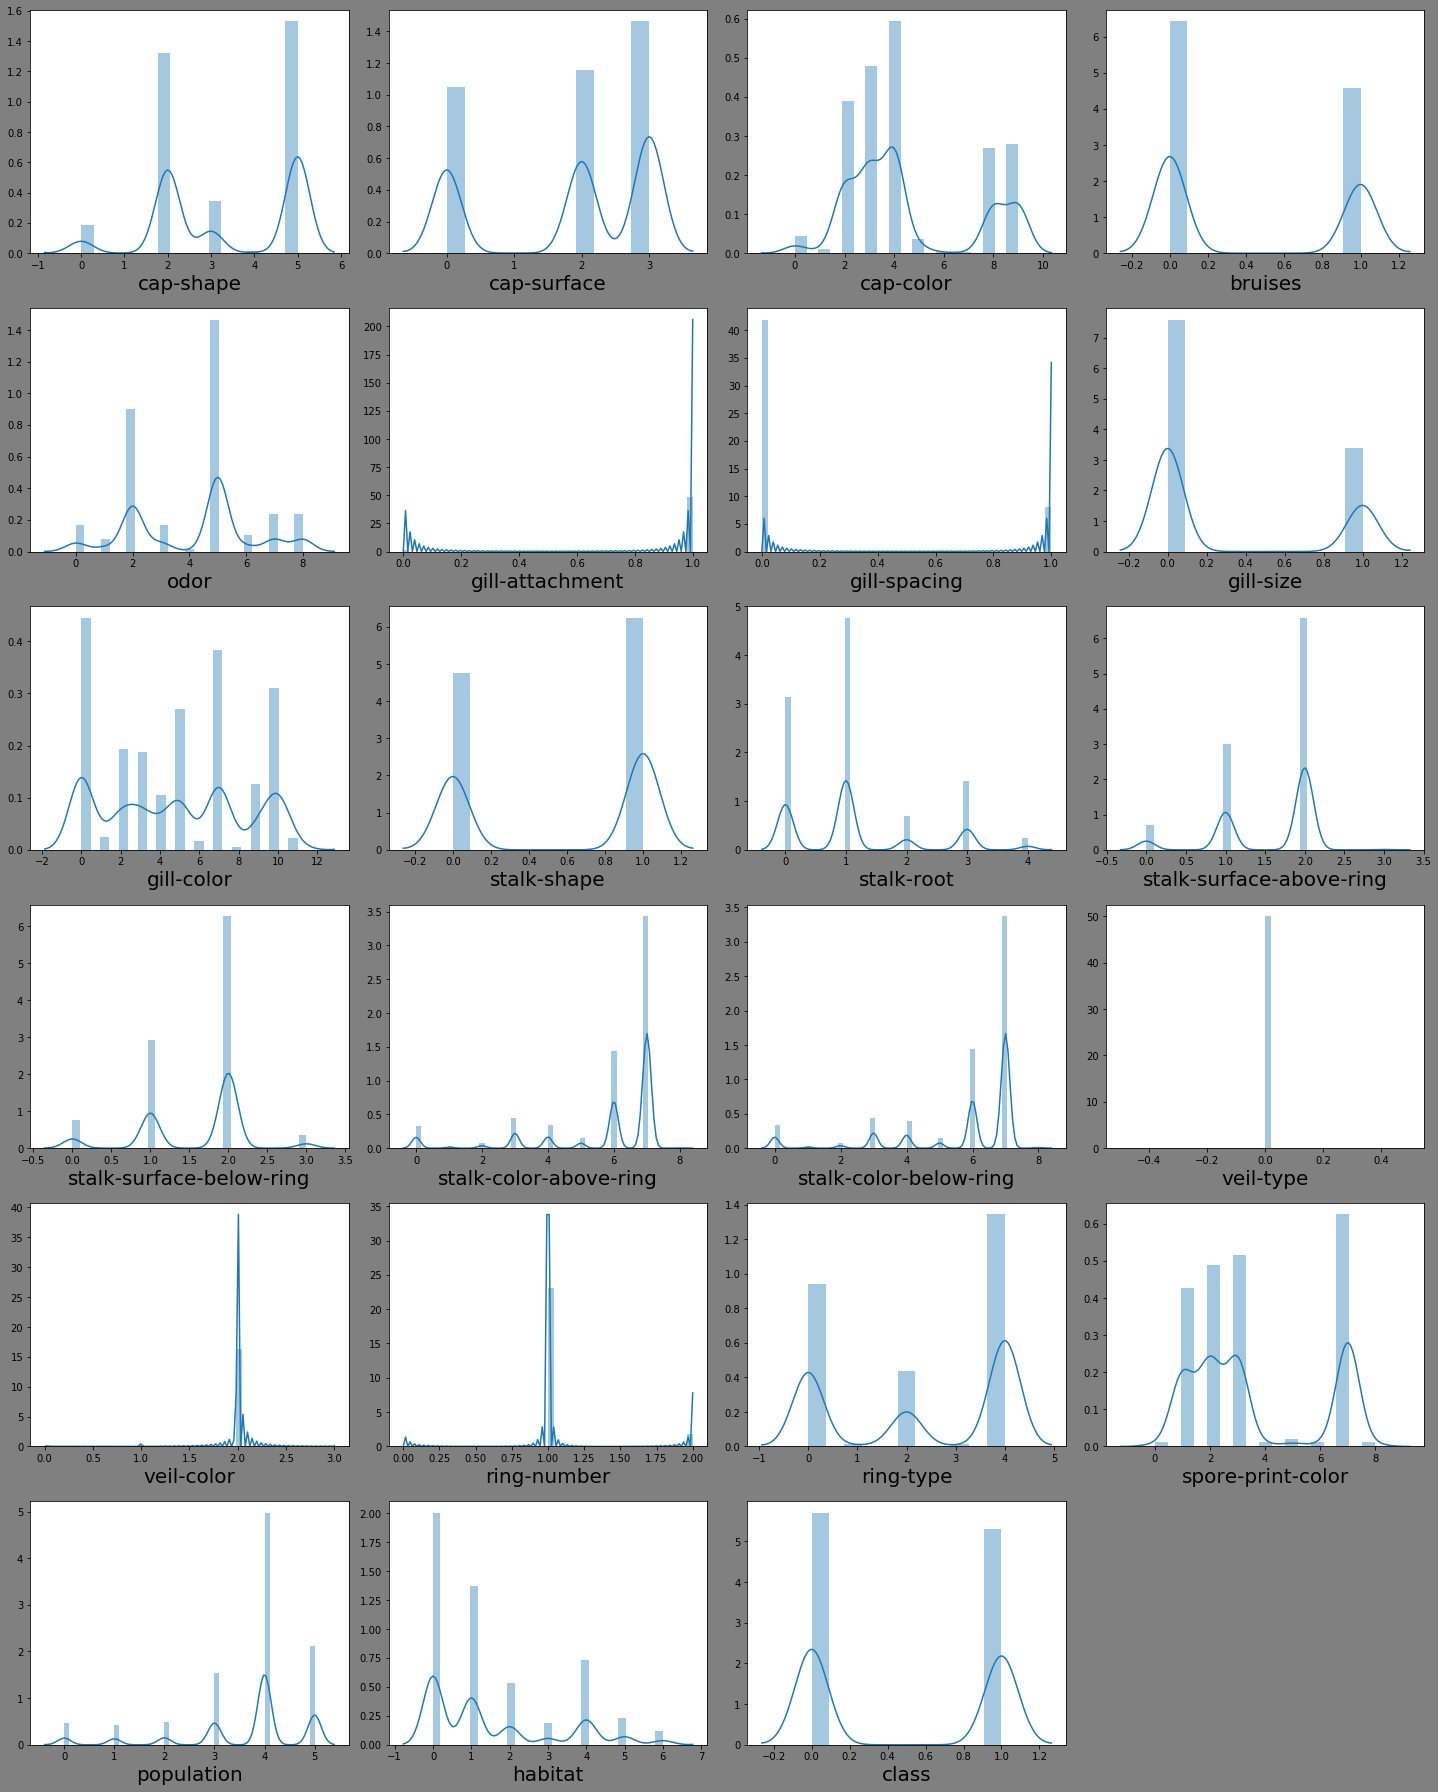

In [77]:
#let see how data is distribute in every column

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df1:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Using SelectKBest feature Selection menthod

In [78]:
from sklearn.feature_selection import SelectKBest,f_classif

In [79]:
x = df1.drop('class',axis = 1)
y = df1['class']

In [80]:
type(x)

pandas.core.frame.DataFrame

In [81]:
best_features = SelectKBest(score_func=f_classif,k = 16)#Behind the seen f_classif uses ANOVA Test to find best K's
fit = best_features.fit(x,y)#give I/P and O/P to model to find best K's

In [82]:
df_scores = pd.DataFrame(fit.scores_)#it represent the score of each column
df_columns = pd.DataFrame(x.columns)# Access each column

#concatinate Dataframes (Score of each column and its name)
feature_score = pd.concat([df_scores,df_columns],axis=1)
feature_score.columns = ['Score','Feature Name'] #assign name to O/P columns
print(feature_score.nlargest(16,'Score')) # print 17 Best feature

          Score              Feature Name
7   3343.700439                 gill-size
8   3182.110596                gill-color
3   2729.510254                   bruises
18  1658.307007                 ring-type
10  1365.373901                stalk-root
6   1121.971924              gill-spacing
11  1023.906250  stalk-surface-above-ring
12   796.237427  stalk-surface-below-ring
20   795.558777                population
21   402.052460                   habitat
17   391.206696               ring-number
1    267.136200               cap-surface
19   247.489716         spore-print-color
13   197.297867    stalk-color-above-ring
14   178.710388    stalk-color-below-ring
16   174.766830                veil-color


we can observ that column no. 16 is removed from the feature because its same for both O/P (0,1) .which dosent make us help to devide in 0 AND 1

### Model Building

In [83]:
new_X=df1[['gill-size','gill-color','bruises','ring-type','stalk-root','gill-spacing','stalk-surface-above-ring','stalk-surface-below-ring','population','habitat','ring-number','cap-surface','spore-print-color','stalk-color-above-ring','stalk-color-below-ring','veil-color']]

In [84]:
t=new_X.columns

In [85]:
new_X#first 16 Best features.

,gill-size,gill-color,bruises,ring-type,stalk-root,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,habitat,ring-number,cap-surface,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,veil-color
0,1,4,1,4,3,0,2,2,3,5,1,2,2,7,7,2
1,0,4,1,4,2,0,2,2,2,1,1,2,3,7,7,2
2,0,5,1,4,2,0,2,2,2,3,1,2,3,7,7,2
3,1,5,1,4,3,0,2,2,3,5,1,3,2,7,7,2
4,0,4,0,0,3,1,2,2,0,1,1,2,3,7,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,11,0,4,0,0,2,2,1,2,1,2,0,5,5,1
8120,0,11,0,4,0,0,2,2,4,2,1,2,0,5,5,0
8121,0,5,0,4,0,0,2,2,1,2,1,2,0,5,5,1
8122,1,0,0,0,0,0,2,1,4,2,1,3,7,7,7,2


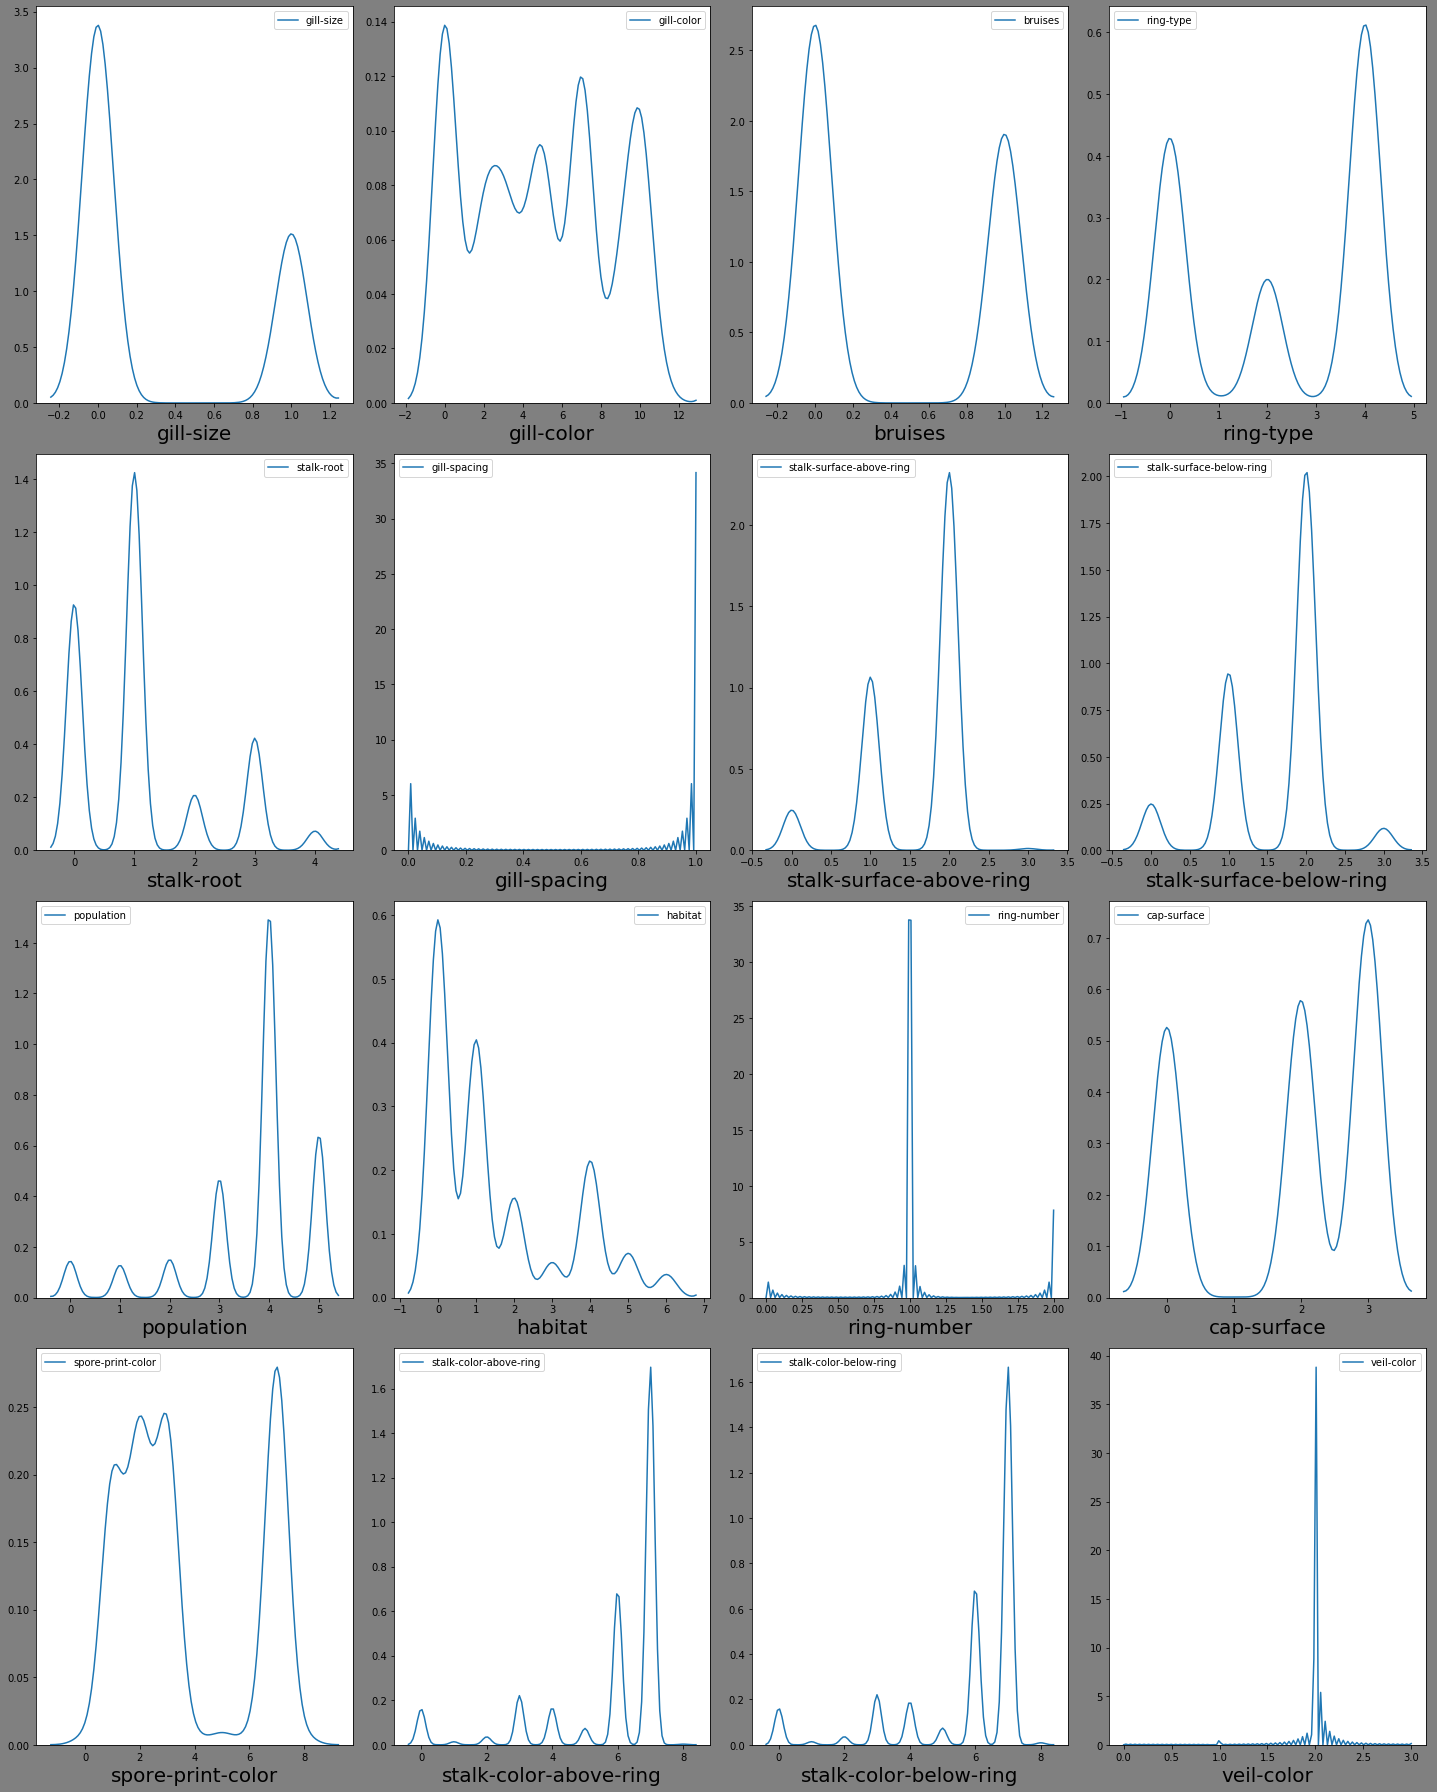

In [86]:
#let see how data is distribute in every column

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in new_X:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.kdeplot(new_X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

##### Here we can not apply the outlier removal or skewness removal technique .Because our data is Categorical Data.

In [87]:
#Scaled the data So all Data points will come in 1 range.
scalar=StandardScaler()
X_Scalar=scalar.fit_transform(new_X)

In [88]:
X_Scalar.shape

(8124, 16)

In [89]:
#Building model to test unexposed Data by using KNeighborsClassifier (Hold out method)
x_train,x_test,y_train,y_test = train_test_split(X_Scalar,y,test_size = 0.35, random_state = 120)

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [90]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1460,    0],
       [   0, 1384]], dtype=int64)

In [91]:
#Now we'll find the accurecy of model ....
print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1460
           1       1.00      1.00      1.00      1384

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844



###### Cross Validation Score to check if the model is overfitting or not

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
#As per given cv=2 mean 2 times test data will cross validate and find the score
cross_val_score(knn,X_Scalar,y,cv = 2).mean()

0.8053914327917282

In [94]:
#As per given cv=5 mean 5 times test data will cross validate and find the score
cross_val_score(knn,X_Scalar,y,cv = 5).mean()

0.8735666301717963

In [95]:
#same thing we are doing what we did with CV = 2,5
cross_val_score(KNeighborsClassifier(),X_Scalar,y,cv = 8).mean()

0.8986763508009774

In [96]:
cross_val_score(knn,X_Scalar,y,cv = 4).mean()

0.8792466765140325

In [97]:
cross_val_score(KNeighborsClassifier(),X_Scalar,y,cv = 10).mean()

0.9480431277802296

### Note :-  
When we are incresing the no. of CV the Score is increase & vaice versa

### OBSERVATION: -

we can observ that our model is might be overfitted bcz its giving us 100% accurecy ...
But if we check with CV technique we are getting different Score,It mean we are missing someting.....and the different Score, is varying as per the provided CV. Now we found the problem , if we contentiou with the available data then there is highly possibilite that we defenitely get destract from Our Target.SO now we go with Hyper Parameter turning by using GridSearchCV for best parameter.

##### Let Us GridSearchCV for the best parameter to improve accuracy

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
#Find Best(sutable) params for model building which help us to achieve good accurecy
param_grid={'algorithm' : ['kd_tree','brute'],'leaf_size' : [18,11,9,8,14,19,12], 'n_neighbors' : [5,7,13,4,5,8,10,15]}

In [100]:
#test all params on build model
gridsearch = GridSearchCV(estimator=knn , param_grid=param_grid)

In [101]:
#train model on all possible parmutaions and combination of provided parameters.that which parameter combination gives us best accurecy.
gridsearch.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [18, 11, 9, 8, 14, 19, 12],
                         'n_neighbors': [5, 7, 13, 4, 5, 8, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [102]:
#Best(sutable) params for model building which help us to achieve good accurecy
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 18, 'n_neighbors': 5}

In [103]:
#we will use best parameters in our K-NN algo and will again check accuracy
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=15,n_neighbors=3)

In [104]:
#train the model
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [105]:
#predict the O/P of test set
y_pred=knn.predict(x_test)

In [106]:
#compare test result with actual result
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1460,    0],
       [   0, 1384]], dtype=int64)

In [107]:
#Classification report
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1460
           1       1.00      1.00      1.00      1384

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844



##### Observation :
    
    The Accurecy which we got in CV (Hold Out method) is as same we found by using  GridSearchCV.

In [108]:
#after reaching on maximum accurecy of model we have to save the model
import pickle

In [109]:
filename='finalmodel.pickle'
pickle.dump(KNeighborsClassifier,open(filename,'wb'))

#prediction using saved model
loaded_model = pickle.load(open(filename, 'rb'))